In [122]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [123]:
try:
    data = pd.read_csv('Credit_Card_Applications.csv')
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("ERROR: I can't find the file. Check the file name matches 'Credit_Card_Applications.csv'")

Dataset loaded successfully!


In [124]:
fraud = data[data['Class'] == 1]
normal = data[data['Class'] == 0]

In [125]:
print(f"Original Fraud Cases: {len(fraud)}")
print(f"Original Normal Cases: {len(normal)}")

Original Fraud Cases: 307
Original Normal Cases: 383


In [126]:
normal_sample = normal.sample(n=len(fraud), random_state=42)


In [127]:
new_data = pd.concat([normal_sample, fraud], axis=0)

print(f"Balanced Dataset Size: {len(new_data)} rows")

Balanced Dataset Size: 614 rows


In [128]:
X = new_data.drop('Class', axis=1) # Features
Y = new_data['Class']

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [130]:
print("⏳ Training Random Forest Model... (Please wait)")
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)
print("✅ Training Complete!")

⏳ Training Random Forest Model... (Please wait)
✅ Training Complete!


In [131]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)


In [132]:
print("------------------------------------------------")
print(f"🚀 FINAL ACCURACY SCORE: {test_data_accuracy * 100:.2f}%")
print("------------------------------------------------")
print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))

------------------------------------------------
🚀 FINAL ACCURACY SCORE: 87.80%
------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        68
           1       0.86      0.87      0.86        55

    accuracy                           0.88       123
   macro avg       0.88      0.88      0.88       123
weighted avg       0.88      0.88      0.88       123



In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

C:\Users\Richin\AppData\Local\Temp\ipykernel_15348\2499444532.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')


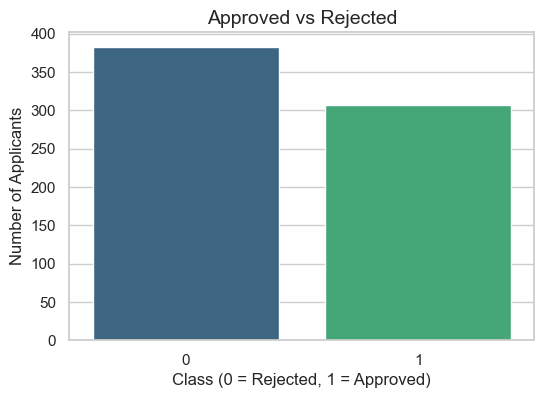

In [134]:
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title('Approved vs Rejected', fontsize=14)
plt.xlabel('Class (0 = Rejected, 1 = Approved)')
plt.ylabel('Number of Applicants')
plt.show()

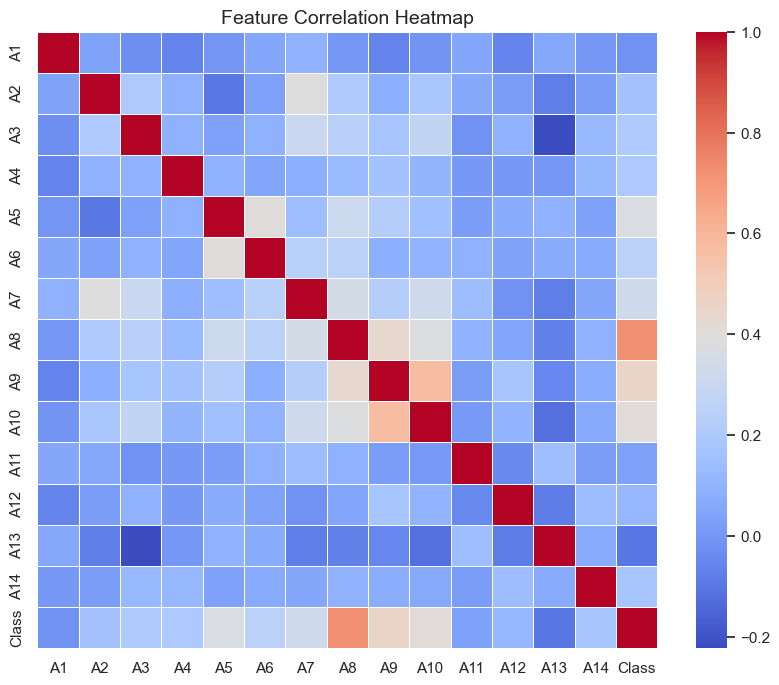

In [135]:
plt.figure(figsize=(10, 8))
corr_data = data.drop(['CustomerID'], axis=1) 
corr = corr_data.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap', fontsize=14)
plt.show()

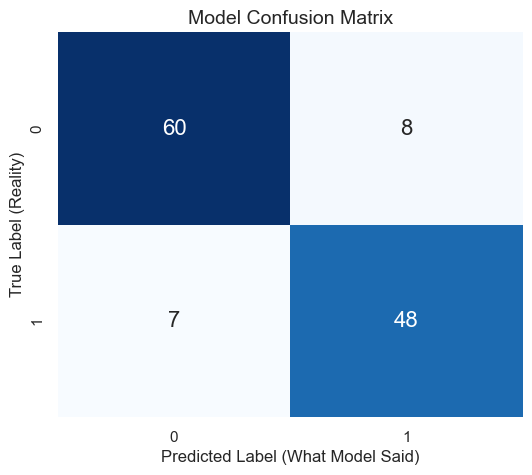

In [136]:
cm = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Model Confusion Matrix', fontsize=14)
plt.xlabel('Predicted Label (What Model Said)')
plt.ylabel('True Label (Reality)')
plt.show()